# ST3189 Assignment 2

10. This question should be answered using the Carseats data set.

(a) Fit a multiple regression model to predict Sales using Price,
Urban, and US.

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from scipy import stats

In [94]:
url = 'https://raw.githubusercontent.com/selva86/datasets/master/Carseats.csv'
carseat = pd.read_csv(url)

In [95]:
carseat.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [96]:
carseat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [97]:
carseat['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [98]:
X = carseat[['Price','Urban', 'US']]
y = carseat['Sales']

In [99]:
column_transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), ['Urban', 'US']), remainder = 'passthrough')
X = pd.DataFrame(column_transformer.fit_transform(X), columns=['Urban', 'US', 'Price'])

In [100]:
X= sm.add_constant(X)
reg1 = sm.OLS(y,X).fit()

In [101]:
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           2.39e-23
Time:                        17:43:46   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

In [102]:
print(mse_lin)

7.689845773576477


(b) Provide an interpretation of each coefficient in the model. Be
careful — some of the variables in the model are qualitative

The model has bad performance.  With an R-squared of 0.23 we can only explain 23% of the variance by the features selected. US is a dummy variable which takes the value of 1 when it had the value of YES and 0 for the value NO. When stores are in the US their sales are arond 1.200 more than when they are not (ceteris paribus) and we have a p value of 0.  Urban is also binary and takes 1 when it had a yes value.  It has a very high p value which indicates it is not significant.  When Urban is 1 sales go down by 21 ceteris paribus.  Price is also significant with a p value of 0, if the price increases by one sales decrease by 545.

(c) Write out the model in equation form, being careful to handle
the qualitative variables properly

sales = 6.7262 -0.0219UrbanYes + 1.2006USYes - 0.0545Price

(d) For which of the predictors can you reject the null hypothesis
H0 : βj = 0?

US and Price to the 1% significance level

(e) On the basis of your response to the previous question, fit a
smaller model that only uses the predictors for which there is
evidence of association with the outcome.


In [103]:
X = carseat[['Price', 'US']]
y = carseat['Sales']
column_transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), ['US']), remainder = 'passthrough')
X = pd.DataFrame(column_transformer.fit_transform(X), columns=['US', 'Price'])
X= sm.add_constant(X)
reg2 = sm.OLS(y,X).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           2.66e-24
Time:                        17:43:52   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.0

(f) How well do the models in (a) and (e) fit the data

They fit the data badly and very similarly.  They have adjuster R-squared of 0.234 and 0.235 respectively which is low.  There is not enough information to predict the sales

Text(0.5, 1.0, 'QQ Plot for Model 2')

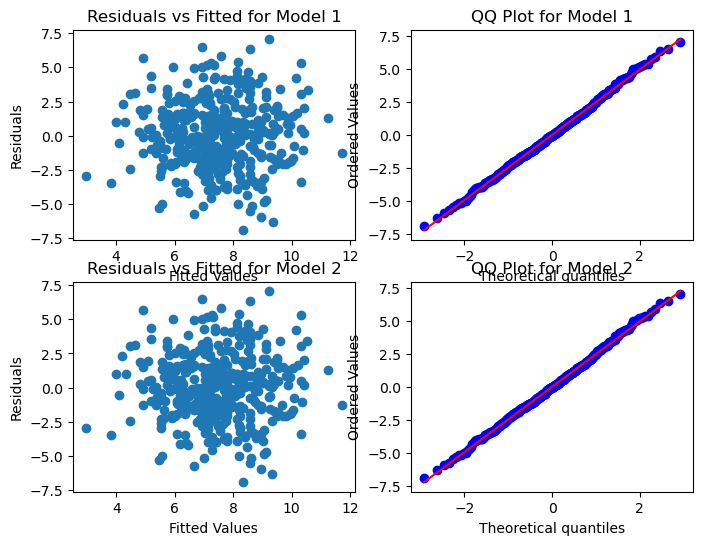

In [112]:
fig, ax = plt.subplots(2,2, figsize=(8,6))
ax[0,0].scatter(reg1.fittedvalues, reg1.resid)
ax[0,0].set_xlabel('Fitted Values')
ax[0,0].set_ylabel('Residuals')
ax[0,0].set_title('Residuals vs Fitted for Model 1')

stats.probplot(reg1.resid, plot=ax[0,1])
ax[0,1].set_title('QQ Plot for Model 1')

ax[1,0].scatter(reg2.fittedvalues, reg2.resid)
ax[1,0].set_xlabel('Fitted Values')
ax[1,0].set_ylabel('Residuals')
ax[1,0].set_title('Residuals vs Fitted for Model 2')

stats.probplot(reg2.resid, plot=ax[1,1])
ax[1,1].set_title('QQ Plot for Model 2')

No big difference also in plots to prefer one model over the other

(g) Using the model from (e), obtain 95% confidence intervals for
the coefficient(s)

In [113]:
conf_int = reg2.conf_int(alpha = 0.05)
conf_int.columns = ['2.5%', '97.5%']
conf_int['Coef'] = reg2.params
print(conf_int)

           2.5%      97.5%       Coef
const  11.79032  14.271265  13.030793
US      0.69152   1.707766   1.199643
Price  -0.06476  -0.044195  -0.054478


h) Is there evidence of outliers or high leverage observations in the
model from (e)?

There are some but not that many or that large to worry about